# **DECISION TREE & ENSEMBLE METHODS**

# Step-1 : Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step-2 : Data Collection

In [2]:
# Read the dataset

df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Step-3 : Exploratory Data Analysis (EDA)

In [3]:
# Shape of the dataset

df.shape

(150, 5)

In [ ]:
# Data description

df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# Check for missing values

df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
# Check for duplicates

df.duplicated().sum()

np.int64(3)

In [7]:
# Categories in Target

df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

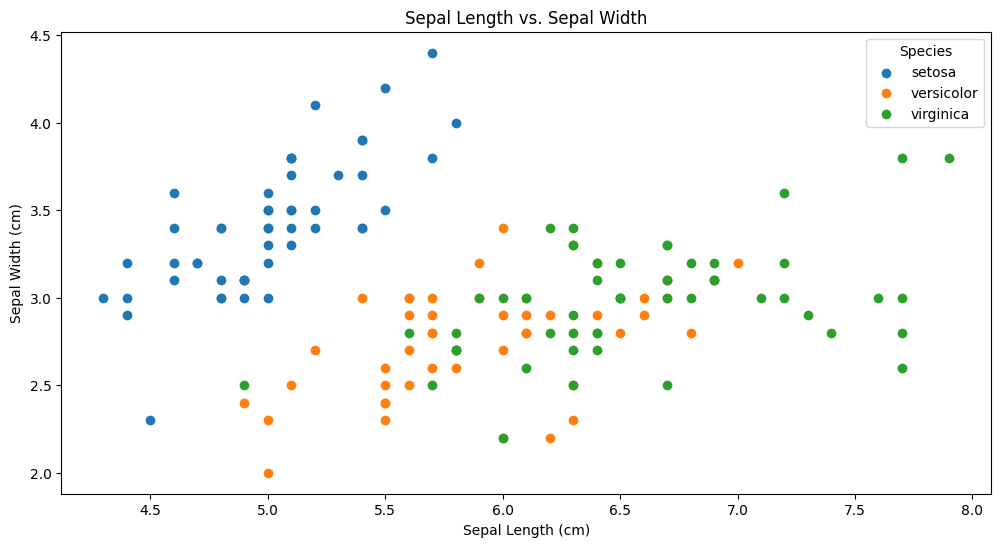

In [8]:
# Scatter plot of the features colored by class

plt.figure(figsize=(12, 6))
for species, species_data in df.groupby('species'):
    plt.scatter(species_data['sepal_length'], species_data['sepal_width'], label=species)

plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend(title='Species')
plt.title('Sepal Length vs. Sepal Width')
plt.show()

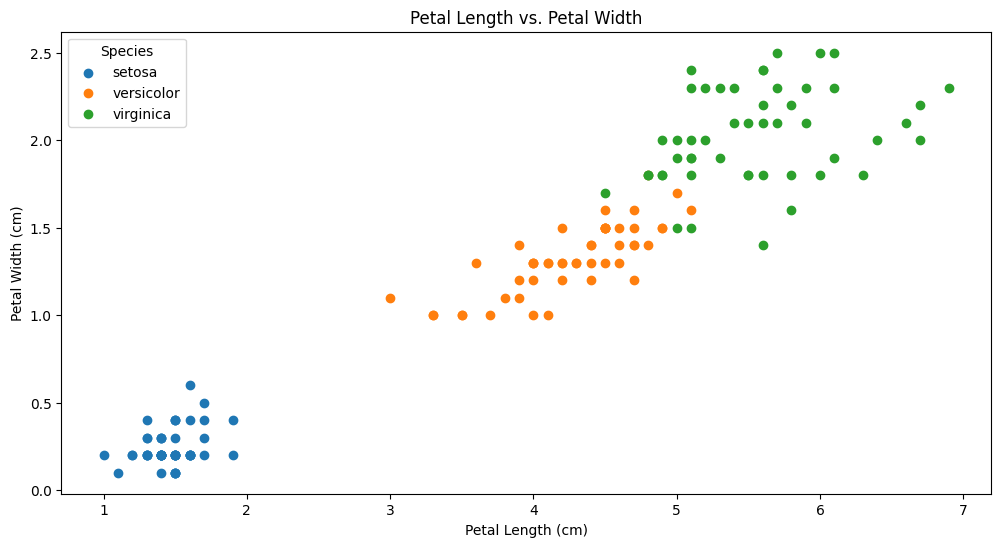

In [9]:
# Scatter plot of the features colored by class

plt.figure(figsize=(12, 6))
for species, species_data in df.groupby('species'):
    plt.scatter(species_data['petal_length'], species_data['petal_width'], label=species)

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Species')
plt.title('Petal Length vs. Petal Width')
plt.show()

# Step-4 : Data Preprocessing

In [10]:
# Drop the duplicates and inplace the changes

df.drop_duplicates(inplace=True)
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Step-5 : Data Splitting

In [11]:
# Splitting the data into features and target using Train Test Split

x = df.drop(columns='species')
y = df['species']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
y_test.head()

127     virginica
53     versicolor
140     virginica
19         setosa
106     virginica
Name: species, dtype: object

# Step-6 : Model Development

In [12]:
# Choose the Decision Tree Model and fit the model for training data

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

# Step-7 : Model Evaluation

In [13]:
# Make Predictions on the Test Data

y_pred = model.predict(x_test)
y_pred

array(['virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [14]:
# Model Evaluation using Confusion Matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n")
print(confusion)

Confusion Matrix:

[[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [15]:
# Classification Report of the Model (Precision, Recall, F1-Score)

classification = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(classification)

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Decision Tree Classification

In [16]:
!pip install pydotplus

import pydotplus
from sklearn.tree import export_graphviz


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
# Visualizing the Decision Tree

dot_data = export_graphviz(
    model,
    out_file=None,
    feature_names=x.columns,
    class_names=y.unique(),
    filled=True,
    rounded=True,
    special_characters=True
)

graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png("iris_decision_tree.png")

True

# **ENSEMBLE METHODS**

# BAGGING - Random Forest

In [18]:
# Import Random Forest and Gradient Boosting Classifier libraries

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [19]:
# Fit the Random Forest Model for training

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [20]:
# Make Predictions on the Test Data

y_pred = model.predict(x_test)
y_pred

array(['virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [21]:
# Model Evaluation using Confusion Matrix

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", confusion)

Confusion Matrix :
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [22]:
# Classification Report of Random Forest Model

classification = classification_report(y_test, y_pred)
print("Classification Report :\n", classification)

Classification Report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# BOOSTING - Gradient Boosting

In [23]:
# Fit the Gradient Boosting Model for training

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [24]:
# Make Predictions on the Test Data

y_pred = model.predict(x_test)
y_pred

array(['virginica', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'setosa', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'versicolor', 'setosa'], dtype=object)

In [25]:
# Confusion Matrix of Gradient Boosting Model

confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix :\n", confusion)

Confusion Matrix :
 [[11  0  0]
 [ 0  9  1]
 [ 0  1  8]]


In [ ]:
# Classification Report of Gradient Boosting Model

classification = classification_report(y_test, y_pred)
print("Classification Report :\n", classification)

Classification Report :
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.90      0.90      0.90        10
   virginica       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

